## Determinant detector

In this exercise we will use determinants to identify whether a point (e.g. a mouse click on a screen) is inside or outside of a triangle. This skill can be useful in various applications, including graphics programming, game development, and interactive simulations.

In order to do this we first need to revisit how we calculate the area of a triangle. Run the cell below to draw a triangle $ABC$ as well as an associated parallelogram.


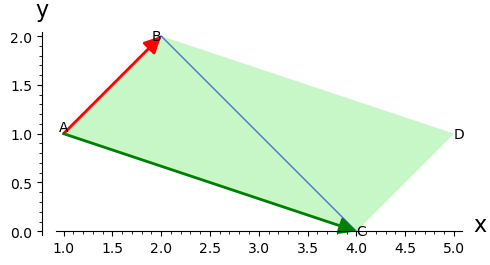

In [1]:
# Define the vertices of the triangle
A = vector([1, 1])
B = vector([2, 2])
C = vector([4, 0])

# Plotting the triangle
triangle_plot = polygon([A, B, C, A], fill=False, color="blue")

# Drawing vectors for sides AB and AC
vector_AB = arrow(A, B, color="red", width=2)
vector_AC = arrow(A, C, color="green", width=2)

# Calculating the fourth vertex of the parallelogram (D) to complete the parallelogram
D = B + (C - A)

# Drawing the parallelogram by adding vectors AB and AC starting from B and C to show completion
parallelogram_plot = polygon([A, B, D, C, A], fill=True, color="lightgreen", alpha=0.5)

# Combine all plots
combined_plot = triangle_plot + vector_AB + vector_AC + parallelogram_plot

# Add text labels for clarity
labels = text('A', A, color='black', fontsize=10, vertical_alignment='bottom') + \
         text('B', B, color='black', fontsize=10, horizontal_alignment='right') + \
         text('C', C, color='black', fontsize=10, horizontal_alignment='left') + \
         text('D', D, color='black', fontsize=10, horizontal_alignment='left')

# Show the combined plot with labels
show(combined_plot + labels, figsize=5, axes_labels=['x', 'y'])

#### Finding area with cross products

Given a triangle with vertices $A(x_1, y_1)$, $B(x_2, y_2)$, and $C(x_3, y_3)$, we can define 3D vectors $\overrightarrow{AB}$ and $\overrightarrow{AC}$ (with $z$ values of 0) based on these points:

$$\overrightarrow{AB} = B - A = (x_2 - x_1, y_2 - y_1, 0)$$
$$\overrightarrow{AC} = C - A = (x_3 - x_1, y_3 - y_1, 0)$$

These vectors represent the sides of the triangle and will be used to calculate the area of the triangle.

The magnitude of the cross product of $\overrightarrow{AB}$ and $\overrightarrow{AC}$ equals the area of the parallelogram formed by these two vectors. The corresponding triangle area is half of this value.

The magnitude of the cross product is calculated as:

$$
||\overrightarrow{AB} \times \overrightarrow{AC}|| = |(x_2 - x_1) \cdot (y_3 - y_1) - (y_2 - y_1) \cdot (x_3 - x_1)|
$$

<div style="background-color: lightpink; color:black; padding: 10px">
    
### Question 1
In the cell below, use the vector functions you learned in the basics file (namely `norm` and `cross_product`) to find the area of the triangle formed by $ABC$. **Place your answer in the first question of the Exercise 05 Learn quiz** Note that in order to use cross product computationally the vectors need to be 3-dimensional. We have started some of the code for you
    
</div>

In [3]:
A = vector([1,1,0])
B = vector([2,2,0])
C = vector([4,0,0])

V = B - A
U = C - A

Triangle = ((V.cross_product(U)).norm()) / 2

show(Triangle);


2

#### Alternative formulation

For the points $A(x_1, y_1)$, $B(x_2, y_2)$, and $C(x_3, y_3)$  we calculated the cross product of the vectors between 2 pairs of these points as:

$$
||\overrightarrow{AB} \times \overrightarrow{AC}|| = |(x_2 - x_1) \cdot (y_3 - y_1) - (y_2 - y_1) \cdot (x_3 - x_1)|
$$

Note however that, with some rearranging, this can also be written as
$$
||\overrightarrow{AB} \times \overrightarrow{AC}|| = |x_1(y_2 - y_3) - x_2(y_1 - y_3) + x_3(y_1 - y_2)|
$$

Interestingly, we can also write this as a determinant using the original points and adding a column of ones

$$
M = \begin{pmatrix}
x_1 & y_1 & 1 \\
x_2 & y_2 & 1 \\
x_3 & y_3 & 1
\end{pmatrix}
$$

Performing cofactor expansion along the first column gives:


$$
\det(M) = x_1 \cdot \det\begin{pmatrix} y_2 & 1 \\ y_3 & 1 \end{pmatrix} - x_2 \cdot \det\begin{pmatrix} y_1 & 1 \\ y_3 & 1 \end{pmatrix} + x_3 \cdot \det\begin{pmatrix} y_1 & 1 \\ y_2 & 1 \end{pmatrix}
$$


and this simplifies to:

$$
\det(M) = x_1(y_2 - y_3) - x_2(y_1 - y_3) + x_3(y_1 - y_2)
$$

That is

$$
    ||\overrightarrow{AB} \times \overrightarrow{AC}|| = |\det(M)|
$$

<div style="background-color: lightblue; color: black; padding: 10px;">
So, in other words, the area of the triangle formed by $A(x_1, y_1)$, $B(x_2, y_2)$, and $C(x_3, y_3)$ is given by

$$
   \text{Area}\Delta ABC =  \frac{1}{2}|\det(M)|
$$

where 

$$
M = \begin{pmatrix}
x_1 & y_1 & 1 \\
x_2 & y_2 & 1 \\
x_3 & y_3 & 1
\end{pmatrix}
$$
</div>

Now onto the question!

<div style="background-color: lightpink; color:black; padding: 10px">

### Question 2

In the cell below use the technique described above to find the area of the triangle $PQR$ if $P = (2,3), Q = (3,-5)$ and $R = (1,2)$. **Place your answer (in decimal form) in the second question of the Exercise 05 Learn quiz** 

Note that for a matrix $A$ you can calculate its determinant using `A.det()`
    
</div>

In [6]:
A = matrix([[2,3,1], [3,-5,1], [1,2,1]]); 
show(A); 

show(A.det()/2); 

[ 2  3  1]
[ 3 -5  1]
[ 1  2  1]

-9/2

#### Determining location of a point

We can now make use of a simple observation to determine whether a point lies within a triangle. Let $P$ be the point in question and assume the triangle has vertex points $A$,$B$ and $C$. If the area of $PAB$ + $PBC$ + $PAC$ equals the area of $ABC$ then the point $P$ must be within the triangle (or on one of its edges). To see a visualization of this run the cell below:

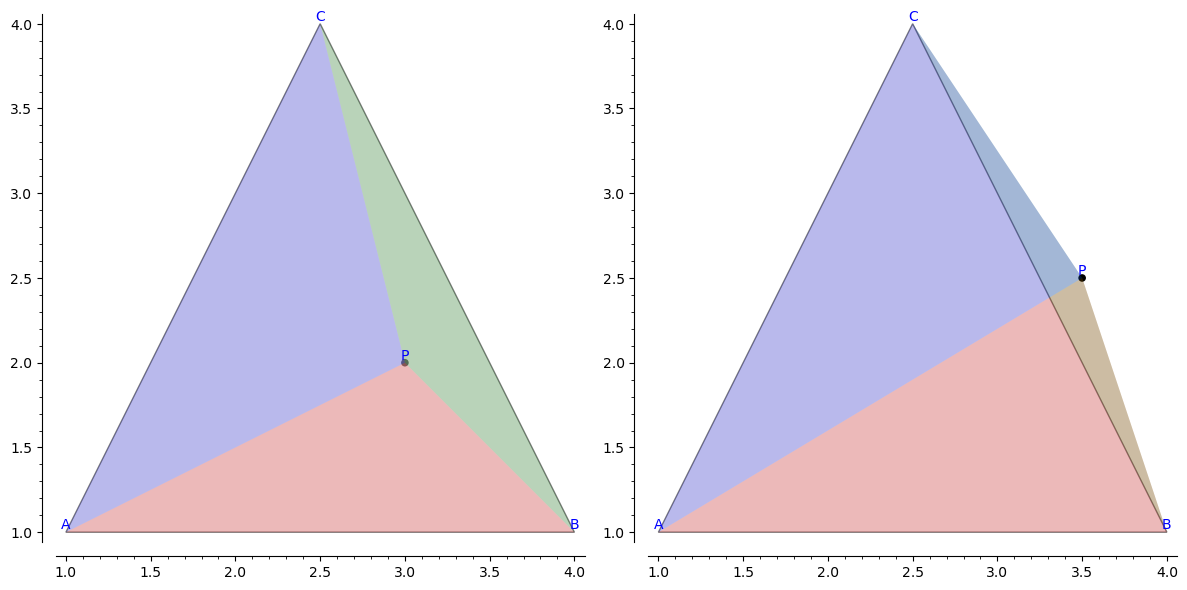

In [7]:
def plot_triangle_and_point(A, B, C, P):
 
    # Plotting
    plot_ABC = polygon([A, B, C], fill=True, color='lightgrey', edgecolor='black', alpha=0.5)
    plot_PAB = polygon([P, A, B], fill=True, color='red', alpha=0.2)
    plot_PBC = polygon([P, B, C], fill=True, color='green', alpha=0.2)
    plot_PAC = polygon([P, A, C], fill=True, color='blue', alpha=0.2)
    points = point(P, size=30, color='black')
    
    # Annotations
    labels = text('A', A, vertical_alignment='bottom') + text('B', B, vertical_alignment='bottom') + text('C', C, vertical_alignment='bottom') + text('P', P, vertical_alignment='bottom')
    
    # Combine plots
    final_plot = plot_ABC + plot_PAB + plot_PBC + plot_PAC + points + labels
    
    # Return the plot to be shown
    return final_plot

# Vertices of triangle ABC
A = (1, 1)
B = (4, 1)
C = (2.5, 4)

# Points to test
P_inside = (3, 2)  
P_outside = (3.5, 2.5)  

# Generate plots
plot_inside = plot_triangle_and_point(A, B, C, P_inside)
plot_outside = plot_triangle_and_point(A, B, C, P_outside)

# Display plots side by side
graphics_array([[plot_inside, plot_outside]]).show(figsize=[12, 6])

For a computer to be able to determine this however, it cannot use images (at least not without some fancy machine learning) so we will make use of our knowledge of determinants to calculate the area of all 4 triangles. In fact your job will be to fill in the body of a python function that will take in 3 points and generate the area of the triangle. You can then reuse this function as much as needed to answer the subsequent questions.

In the cell below complete the function `tr_area` by filling in the matrix. The function should compute the area between the 3 given points (this is really just a generalization of Q2).

**Tip** when given a point such as `P1` in the function below, you can extract its coordinates using `P1[0]` and `P1[1]` for the x and y values respectively.

In [8]:
def tr_area(P1,P2,P3):
    
    #fill in the necessary matrix values below
    M = matrix([[P1[0],P1[1],1], [P2[0],P2[1],1], [P3[0],P3[1],1]])
    
    # compute area using determinant
    area = abs(M.det()/2)
    
    return area


# testing out your function
A = (1,1)
B = (2,2)
C = (4,0)

show(tr_area(A,B,C)) 

# you can also use show(tr_area((1,1),(2,2),(4,0))) without naming the points 
# this could save time for the questions below

2

<div style="background-color: lightpink; color:black; padding: 10px">

### Questions 3-9

Use your function above to determine whether the following points lie within (or on the boundary of) the given triangle. You can use the cell below to type up whatever code you like. For example you could repeatedly call `tr_area` with all of the given points. Alternatively, if you're feeling courageous you could try to build your own function that takes in 4 points and within it uses the `tr_area` function 4 times to properly determine the necessary area computations. Admittedly this latter approach will save a lot of time.

**On Learn Exercise 5 you will answer true or false as to whether the given point is within the given triangle**

**Triangle 1**
   - Vertices: $A = (0, 0), B = (4, 0), C = (2, 3)$
   - Point: $P = (2, 1)$ 
   - For easier copying (0, 0), (4, 0), (2, 3), (2, 1)

**Triangle 2**
   - Vertices: $A = (1, 1), B = (3, 1), C = (2, 4)$
   - Point: $P = (2, 0)$ 
   - For easier copying (1, 1), (3, 1), (2, 4), (2, 0)

**Triangle 3**
   - Vertices: $A = (-1, 0), B = (1, 0), C = (0, 2)$
   - Point: $P = (0, 1)$ 
   - For easier copying (-1, 0), (1, 0), (0, 2), (0, 1)

**Triangle 4**
   - Vertices: $A = (-2, -1), B = (-3, 2), C = (-1, 3)$
   - Point: P = $(-2, 2)$ 
   - For easier copying (-2, -1), (-3, 2), (-1, 3), (-2, 2)

**Triangle 5**
   - Vertices: $A = (3, 3), B = (6, 3), C = (4, 6)$
   - Point: $P = (4, 3)$ 
   - For easier copying (3, 3), (6, 3), (4, 6), (4, 3)
   
**Triangle 6**
   - Vertices: $A = (-3, 3), B = (6, 3), C = (4, 6)$
   - Point: $P = (2, 6)$ 
   - For easier copying (-3, 3), (6, 3), (4, 6), (2, 6)

**Triangle 7**
   - Vertices: $A = (0, 0), B = (5, 0), C = (5, 5)$
   - Point: $P = (5, 5)$ 
   - For easier copying (0, 0), (5, 0), (5, 5), (5, 5)
    
</div>


In [12]:
def pointLie(A, B, C, P): 
    P_A_B = tr_area(P, A, B)
    P_B_C = tr_area(P, B, C)
    P_A_C = tr_area(P, A, C)
    A_B_C = tr_area(A, B, C)
    
    if ((P_A_B + P_B_C + P_A_C) == A_B_C):
        return true
    else:
        return false

    
#1: 
show(pointLie((0, 0), (4, 0), (2, 3), (2, 1)))

#2:
show(pointLie((1, 1), (3, 1), (2, 4), (2, 0)))

#3:
show(pointLie((-1, 0), (1, 0), (0, 2), (0, 1)))

#4:
show(pointLie((-2, -1), (-3, 2), (-1, 3), (-2, 2)))

#5:
show(pointLie((3, 3), (6, 3), (4, 6), (4, 3)))

#6:
show(pointLie((-3, 3), (6, 3), (4, 6), (2, 6)))

#7:
show(pointLie((0, 0), (5, 0), (5, 5), (5, 5)))


True

False

True

True

True

False

True

### Bonus question

Can you think of the extra check that is needed to determine whether a given point is on one of the edges of a triangle?

(There's nothing to answer here, nor are there any points. This is just a brain bonus.)

### What comes next?

This process can be extended to larger polygons by simply converting them into a collection of triangles.